In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings('ignore')


In [22]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [23]:
data.shape

(400, 5)

In [24]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [26]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [27]:
data.select_dtypes(include=['object']).nunique()


Gender    2
dtype: int64

In [28]:
x = data.iloc[:,[2,3]].values       
y = data.iloc[:,4].values

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state = 5)

In [30]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

### SVM

In [33]:
from sklearn.svm import SVC
sv_classifier=SVC(kernel='linear', random_state=0)
sv_classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [34]:
y_pred=sv_classifier.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [36]:
accuracy

0.85

In [37]:
from sklearn.model_selection import GridSearchCV


In [38]:
# define the parameter values that should be searched
parameters = [
    {'C': [1, 10, 100, 3, 5], 'kernel': ['linear']},
    {'C': [1, 30, 10, 7, 9], 'kernel': ['rbf'],  
     'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
]

In [39]:

grid_search=GridSearchCV(estimator=sv_classifier,
                         param_grid=parameters,
                         scoring='accuracy',
                         cv=10,
                         n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)


In [40]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006883,0.002137,0.002143,0.000923,1,linear,NaN,"{'C': 1, 'kernel': 'linear'}",0.833333,0.8,...,0.900000,0.733333,0.866667,0.800000,0.766667,0.900000,0.833333,0.830000,0.052599,50
1,0.008136,0.001781,0.001632,0.000490,10,linear,NaN,"{'C': 10, 'kernel': 'linear'}",0.833333,0.8,...,0.900000,0.733333,0.866667,0.833333,0.766667,0.900000,0.833333,0.833333,0.051640,46
2,0.023155,0.003839,0.001540,0.000646,100,linear,NaN,"{'C': 100, 'kernel': 'linear'}",0.833333,0.8,...,0.900000,0.733333,0.866667,0.833333,0.766667,0.900000,0.833333,0.833333,0.051640,46
3,0.007219,0.002291,0.002681,0.002217,3,linear,NaN,"{'C': 3, 'kernel': 'linear'}",0.833333,0.8,...,0.900000,0.733333,0.866667,0.833333,0.766667,0.900000,0.833333,0.833333,0.051640,46
4,0.006862,0.001840,0.002015,0.000786,5,linear,NaN,"{'C': 5, 'kernel': 'linear'}",0.833333,0.8,...,0.900000,0.733333,0.866667,0.833333,0.766667,0.900000,0.833333,0.833333,0.051640,46
5,0.005633,0.000451,0.002029,0.000222,1,rbf,0.1,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.966667,0.9,...,0.966667,0.833333,0.900000,0.866667,0.766667,0.933333,0.833333,0.890000,0.061554,39
6,0.005796,0.001488,0.002225,0.000499,1,rbf,0.2,"{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}",0.966667,0.9,...,0.966667,0.833333,0.900000,0.866667,0.766667,0.933333,0.866667,0.893333,0.059255,34
7,0.006163,0.001832,0.002005,0.000251,1,rbf,0.3,"{'C': 1, 'gamma': 0.3, 'kernel': 'rbf'}",0.966667,0.9,...,1.000000,0.866667,0.900000,0.866667,0.800000,0.933333,0.866667,0.903333,0.054671,14
8,0.005200,0.001284,0.002172,0.000270,1,rbf,0.4,"{'C': 1, 'gamma': 0.4, 'kernel': 'rbf'}",0.966667,0.9,...,1.000000,0.866667,0.900000,0.866667,0.800000,0.933333,0.866667,0.903333,0.054671,14
9,0.006335,0.002492,0.001970,0.000129,1,rbf,0.5,"{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}",0.966667,0.9,...,1.000000,0.866667,0.900000,0.866667,0.800000,0.933333,0.866667,0.903333,0.054671,14


In [41]:
grid_mean_scores =pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

In [42]:

# examine the first result
print(grid_search.cv_results_['params'][0])
print(grid_search.cv_results_['mean_test_score'][0])

{'C': 1, 'kernel': 'linear'}
0.8300000000000001


In [44]:
accuracy=grid_search.best_score_
print(accuracy)
grid_search.best_params_

0.9100000000000001


{'C': 30, 'gamma': 0.2, 'kernel': 'rbf'}

In [53]:
grid_mean_scores = grid_search.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.83       0.83333333 0.83333333 0.83333333 0.83333333 0.89
 0.89333333 0.90333333 0.90333333 0.90333333 0.90333333 0.90333333
 0.90333333 0.90666667 0.90333333 0.91       0.90666667 0.90666667
 0.89666667 0.89666667 0.89666667 0.89       0.88333333 0.9
 0.90333333 0.91       0.91       0.90666667 0.90333333 0.89
 0.89       0.89333333 0.89666667 0.90333333 0.91       0.91
 0.91       0.90333333 0.9        0.89333333 0.89       0.89666667
 0.90333333 0.91       0.91       0.90666667 0.90333333 0.89333333
 0.89       0.89333333]


Text(0, 0.5, 'Cross-Validated Accuracy')

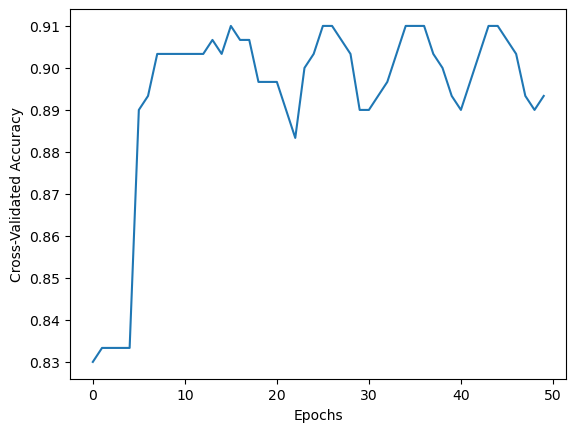

In [54]:
# plot the results
plt.plot(grid_mean_scores)
plt.xlabel('Epochs')
plt.ylabel('Cross-Validated Accuracy')

### try the same steps with knn algorithm and show what happen with using gridsearch 
* reuse the best parameters and repeat the above steps with new best paramerters